In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## News

In [ ]:
news = pd.read_csv('/content/drive/MyDrive/Assignments/Stock price/News_Sentiment.csv')
news['date']=news.date.astype('str')

In [ ]:
news.head()

,date,text,site,positive_Fin,negative_Fin,neutral_Fin
0,2021-09-17,"CORAL GABLES, Fla. (AP) — Federal officials sa...",BarChart,0.048393,0.670535,0.281072
1,2021-09-17,Automakers are looking toward using satellites...,BarChart,0.414908,0.010081,0.575011
2,2021-09-17,"LONDON (AP) — Clive Sinclair, the British inve...",BarChart,0.033260,0.154768,0.811972
3,2021-09-16,Whitney Tilson's email to investors discussing...,BarChart,0.139797,0.021072,0.839131
4,2021-09-16,Let's take a look at some ETFs poised to win f...,BarChart,0.324206,0.009837,0.665957


In [ ]:
print(news.date.min(),' - ', news.date.max())

2020-09-24  -  2021-09-17


In [ ]:
news = news.loc[news.date > '2020-12-31',:]

In [ ]:
news.date.min()

'2021-01-05'

In [ ]:
date = pd.DataFrame({'date':pd.date_range(start='2021-01-05', end='2021-09-17').astype('str')})
date.head()

,date
0,2021-01-05
1,2021-01-06
2,2021-01-07
3,2021-01-08
4,2021-01-09


In [ ]:
news = pd.merge(news, date, how='right', on='date')
news['date']=news.date.astype('datetime64')

In [ ]:
news.isna().sum()

date             0
text            92
site            92
positive_Fin    92
negative_Fin    92
neutral_Fin     92
dtype: int64

### Positive sentiment

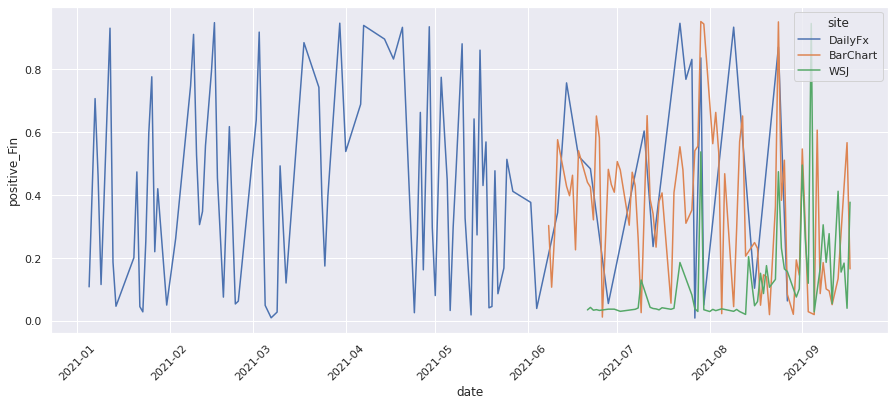

In [ ]:
news_mean = news.groupby(['date','site']).mean().reset_index()
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'positive_Fin', hue = 'site',data=news_mean);
plt.xticks(rotation=45);

### Negative sentiment

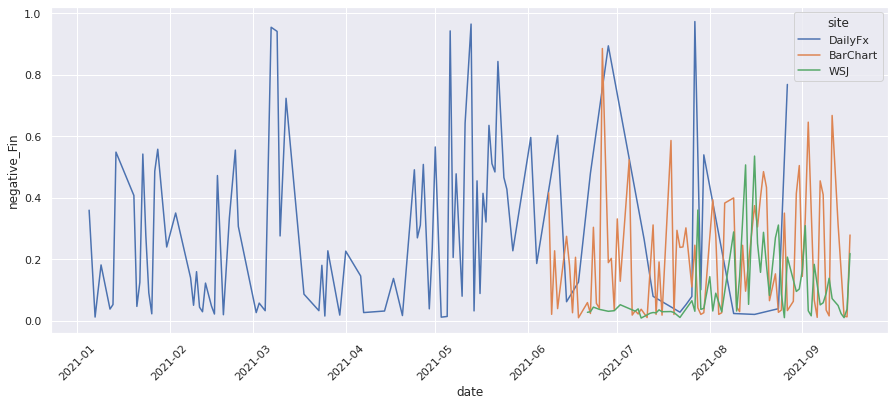

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'negative_Fin', hue = 'site',data=news_mean);
plt.xticks(rotation=45);

### Neutral sentiment

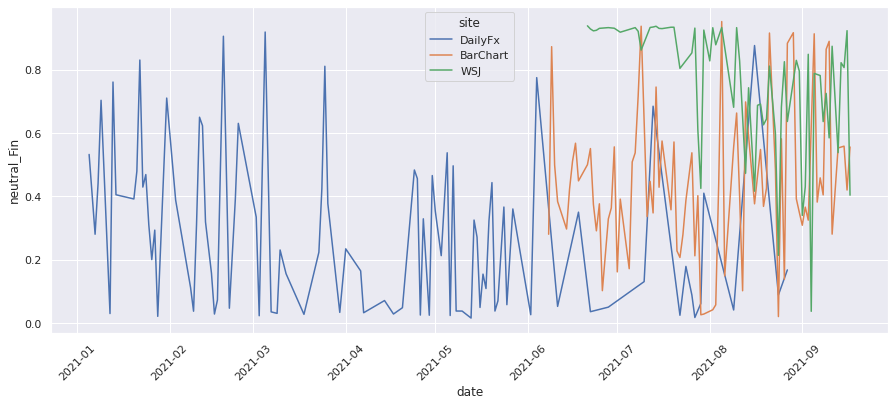

In [ ]:
news_mean = news.groupby(['date','site']).mean().reset_index()
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'neutral_Fin', hue = 'site',data=news_mean);
plt.xticks(rotation=45);

### Difference positive to negative

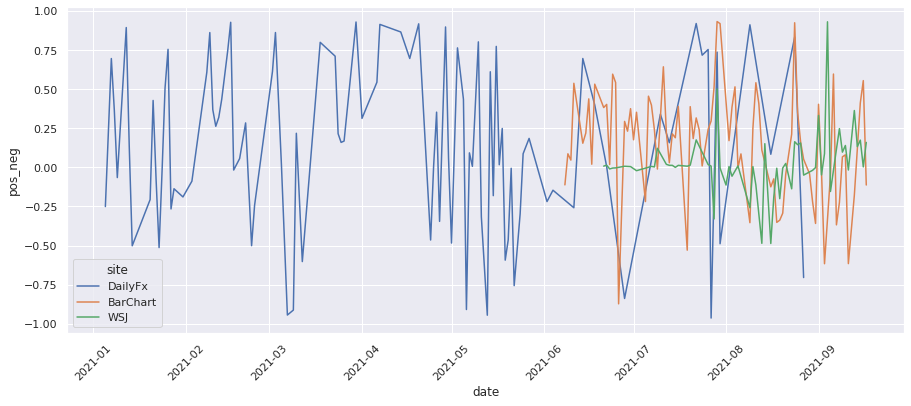

In [ ]:
news_mean['pos_neg'] = news_mean.positive_Fin-news_mean.negative_Fin
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'pos_neg', hue = 'site',data=news_mean);
plt.xticks(rotation=45);

### Ratio pos_neg

In [ ]:
def ratio(a,b):
  if a>b:
    return a/b-1
  else:
    return -(b/a-1)

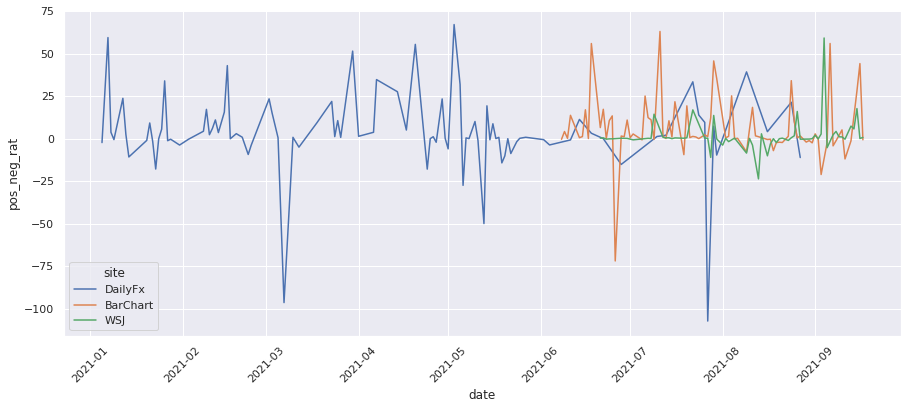

In [ ]:
news_mean['pos_neg_rat'] = news_mean.apply(lambda x: ratio(x.positive_Fin,x.negative_Fin),axis=1)
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'pos_neg_rat', hue = 'site',data=news_mean);
plt.xticks(rotation=45);

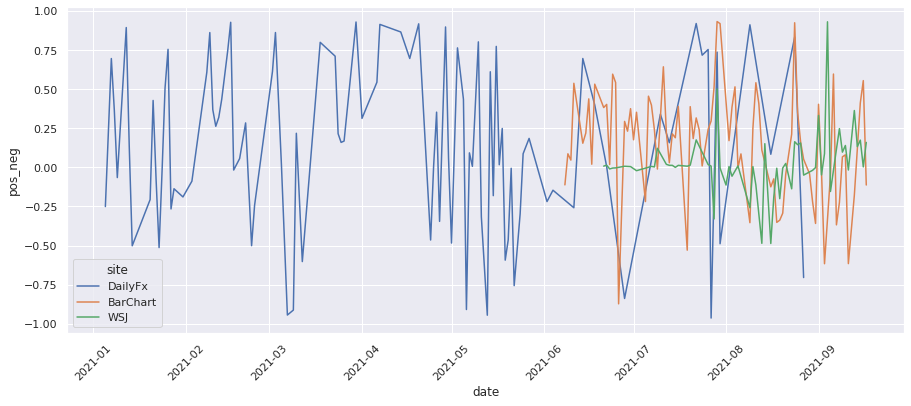

In [ ]:
news_mean['pos_neg'] = news_mean.positive_Fin-news_mean.negative_Fin
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'pos_neg', hue = 'site',data=news_mean);
plt.xticks(rotation=45);

### Mean sites after news_mean

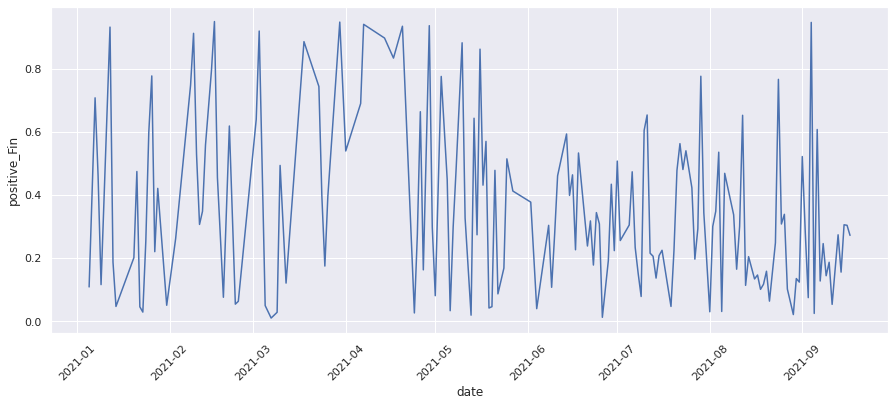

In [ ]:
news_mean = news_mean.groupby(['date']).mean().reset_index()
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'positive_Fin',data=news_mean);
plt.xticks(rotation=45);

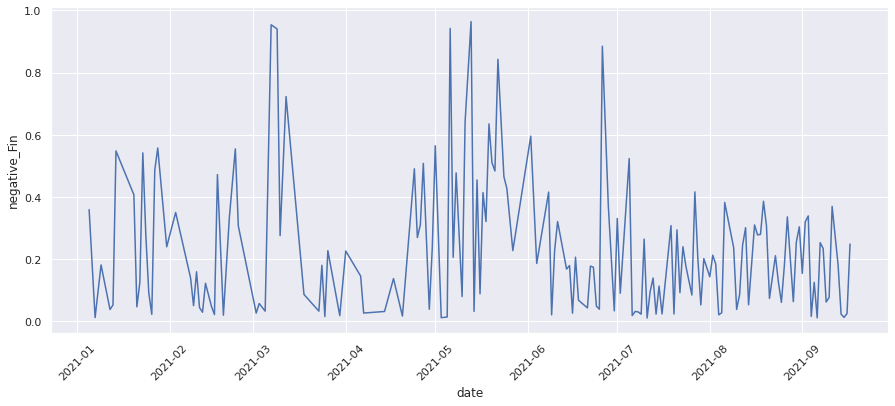

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'negative_Fin',data=news_mean);
plt.xticks(rotation=45);

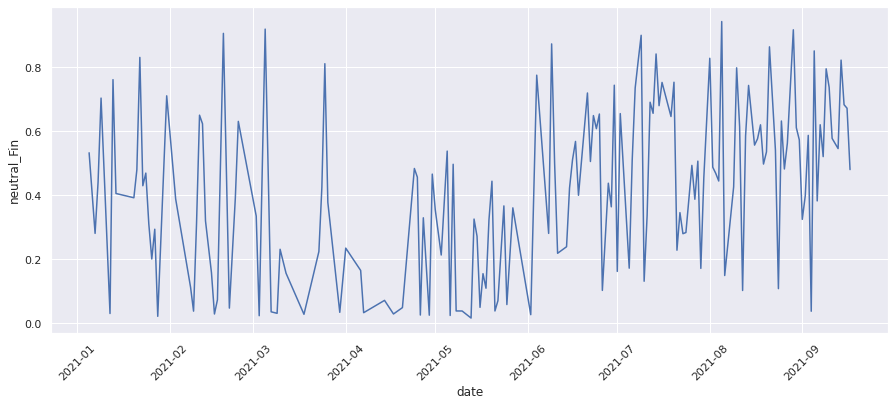

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'neutral_Fin',data=news_mean);
plt.xticks(rotation=45);

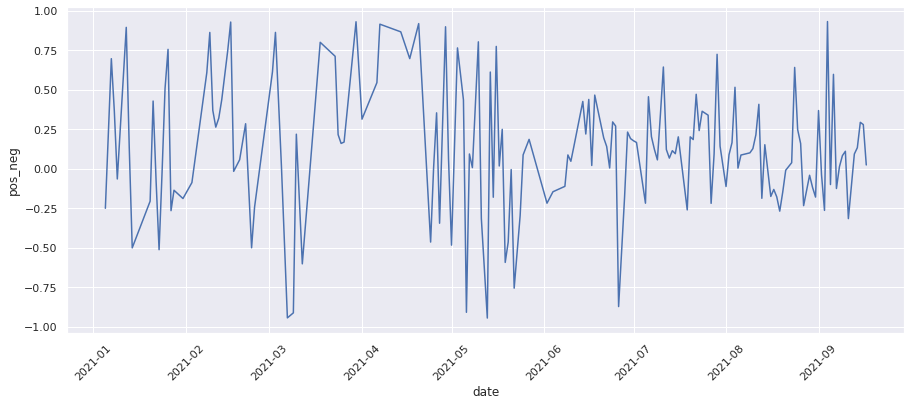

In [ ]:
news_mean['pos_neg'] = news_mean.positive_Fin-news_mean.negative_Fin
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'pos_neg',data=news_mean);
plt.xticks(rotation=45);

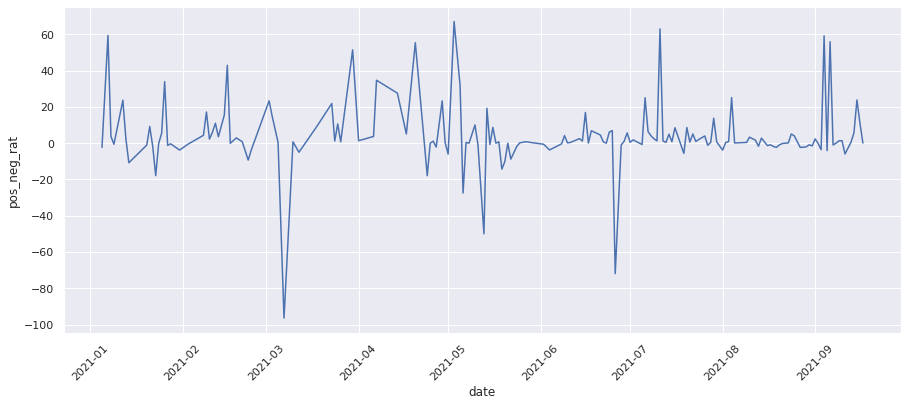

In [ ]:
news_mean['pos_neg_rat'] = news_mean.apply(lambda x: ratio(x.positive_Fin,x.negative_Fin),axis=1)
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'pos_neg_rat',data=news_mean);
plt.xticks(rotation=45);

### Mean sites overall

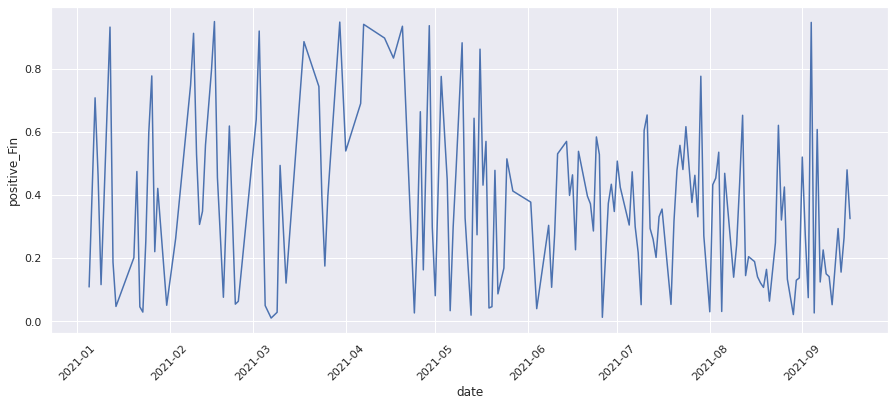

In [ ]:
news_mean = news.groupby(['date']).mean().reset_index()
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'positive_Fin',data=news_mean);
plt.xticks(rotation=45);

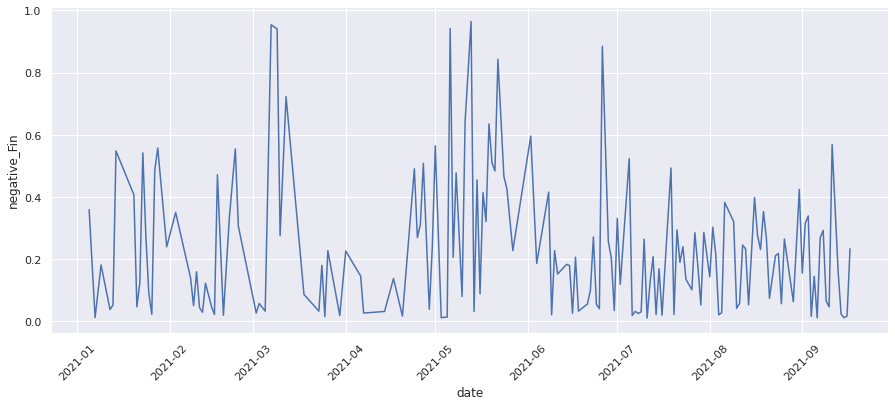

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'negative_Fin',data=news_mean);
plt.xticks(rotation=45);

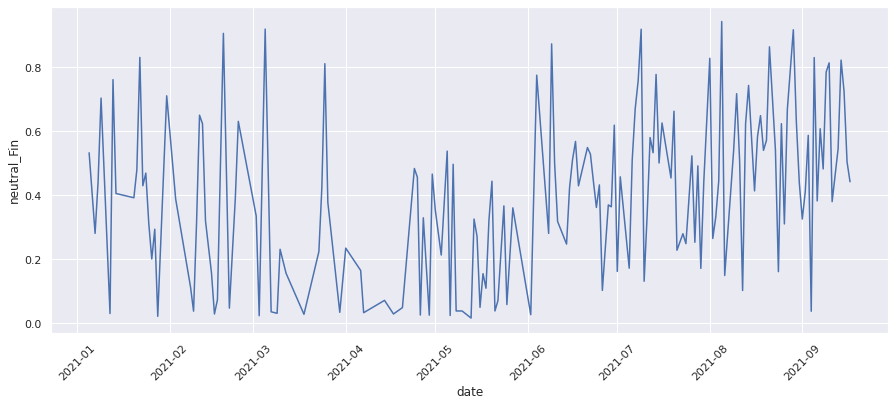

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'neutral_Fin',data=news_mean);
plt.xticks(rotation=45);

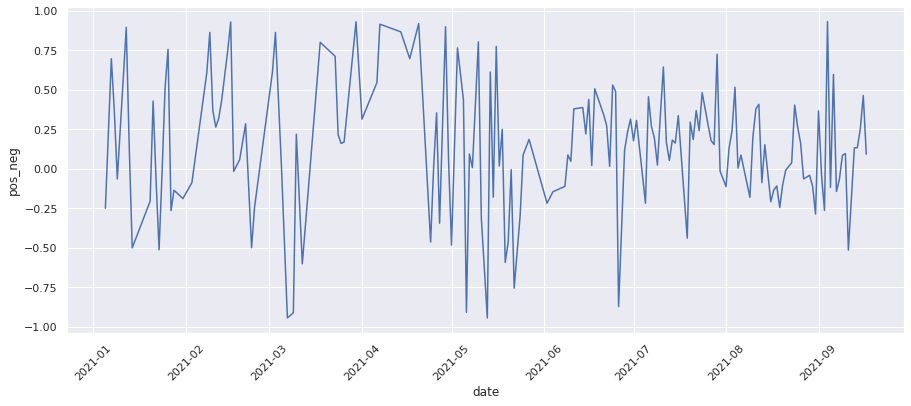

In [ ]:
news_mean['pos_neg'] = news_mean.positive_Fin-news_mean.negative_Fin
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'pos_neg',data=news_mean);
plt.xticks(rotation=45);

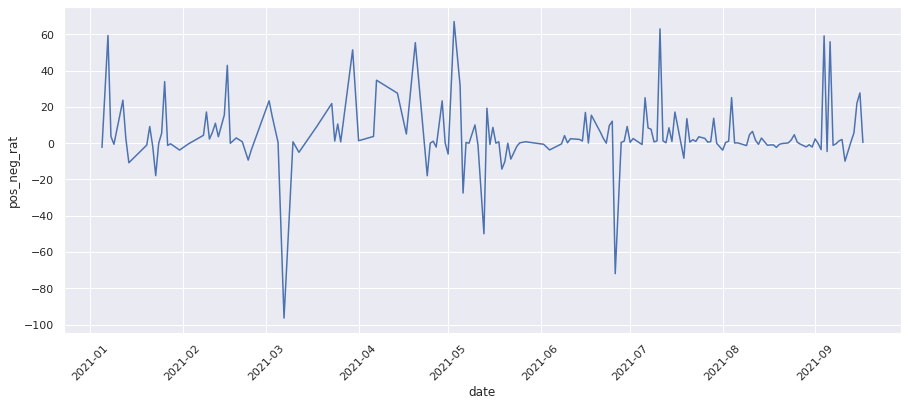

In [ ]:
news_mean['pos_neg_rat'] = news_mean.apply(lambda x: ratio(x.positive_Fin,x.negative_Fin),axis=1)
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'pos_neg_rat',data=news_mean);
plt.xticks(rotation=45);

## Elon

In [ ]:
elon = pd.read_csv('/content/drive/MyDrive/Assignments/Stock price/SocialMedia_Sentiment.csv')
elon = elon.loc[elon.date > '2020-12-31',:]
elon = pd.merge(elon, date, how='right', on='date')
elon['date']=elon.date.astype('datetime64')
elon.isna().sum()

date              0
text            128
positive_Fin    128
negative_Fin    128
neutral_Fin     128
NEG_Tweet       128
NEU_Tweet       128
POS_Tweet       128
site            128
dtype: int64

In [ ]:
elon

,date,text,positive_Fin,negative_Fin,neutral_Fin,NEG_Tweet,NEU_Tweet,POS_Tweet,site
0,2021-01-05,How to finance a Tesla without US credit history?,0.052709,0.020403,0.926888,0.007805,0.966296,0.025899,Reddit
1,2021-01-05,Back up camera and turning radius for new owners,0.106064,0.013086,0.880850,0.002693,0.952934,0.044373,Reddit
2,2021-01-05,Tesla “Autopilot” Crash: Driver’s Friend Revea...,0.041582,0.124438,0.833980,0.570899,0.420520,0.008581,Reddit
3,2021-01-05,Need Some Advice Before I Pull the Trigger on ...,0.050378,0.018601,0.931022,0.002060,0.923606,0.074334,Reddit
4,2021-01-05,Backup camera thinks I’m still at the park…,0.027642,0.125246,0.847112,0.205568,0.786831,0.007600,Reddit
...,...,...,...,...,...,...,...,...,...
10848,2021-09-16,Can’t wait!!,0.059591,0.230542,0.709866,0.002819,0.005190,0.991992,Reddit
10849,2021-09-16,This guy got the memo,0.090117,0.016342,0.893542,0.025421,0.957991,0.016588,Reddit
10850,2021-09-16,Anyone notice the estimated delivery times are...,0.017567,0.099223,0.883210,0.057339,0.934406,0.008255,Reddit
10851,2021-09-16,AP for the win.,0.628295,0.034056,0.337648,0.001356,0.178627,0.820017,Reddit


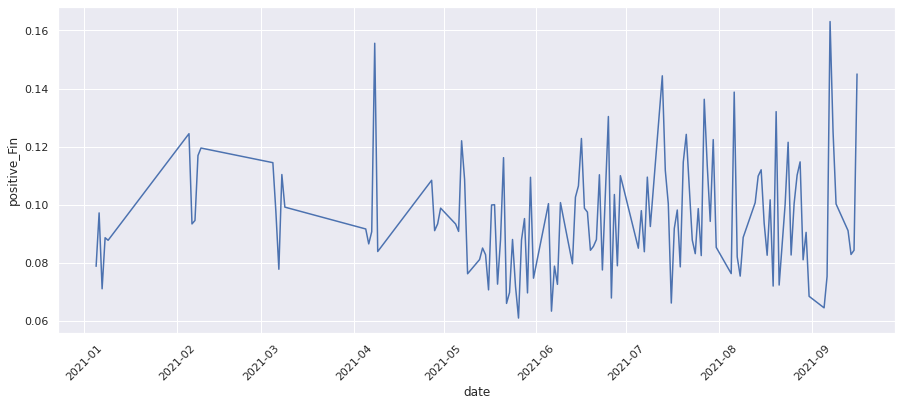

In [ ]:
elon_mean = elon.groupby(['date']).mean().reset_index()
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'positive_Fin',data=elon_mean);
plt.xticks(rotation=45);

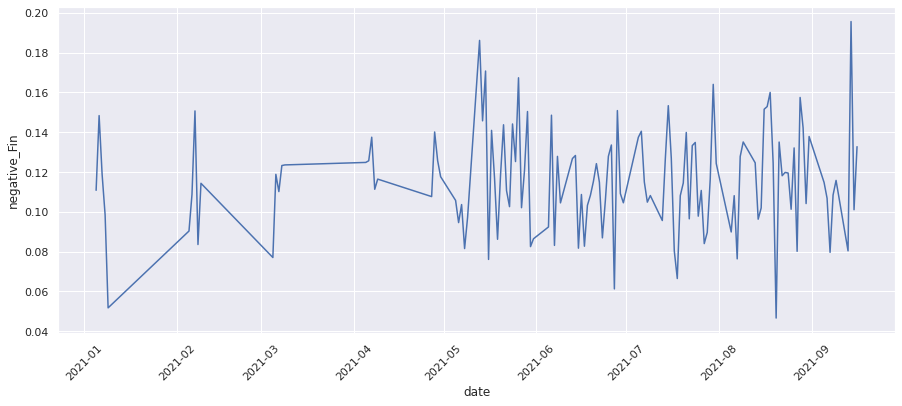

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'negative_Fin',data=elon_mean);
plt.xticks(rotation=45);

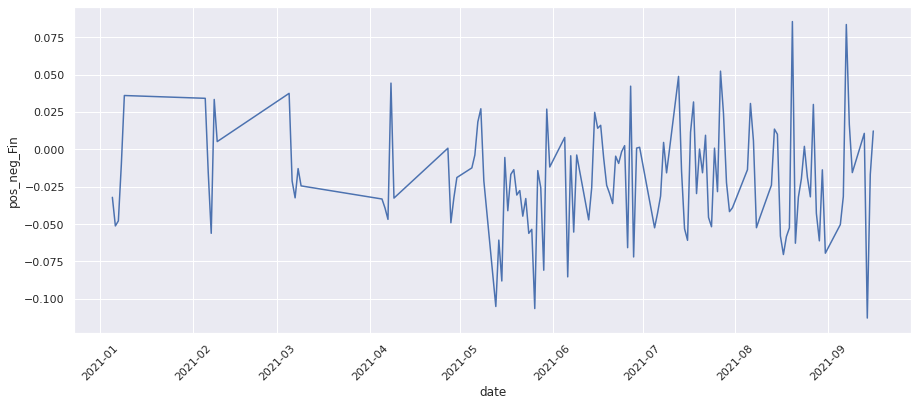

In [ ]:
elon_mean['pos_neg_Fin'] = elon_mean.positive_Fin-elon_mean.negative_Fin
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'pos_neg_Fin',data=elon_mean);
plt.xticks(rotation=45);

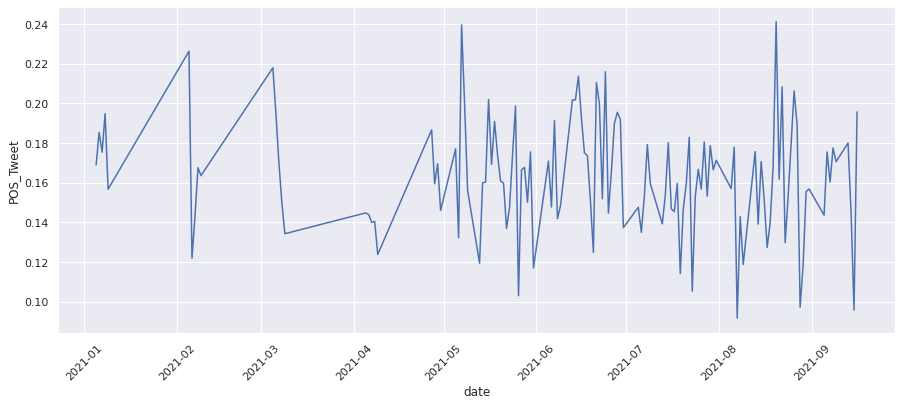

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'POS_Tweet',data=elon_mean);
plt.xticks(rotation=45);

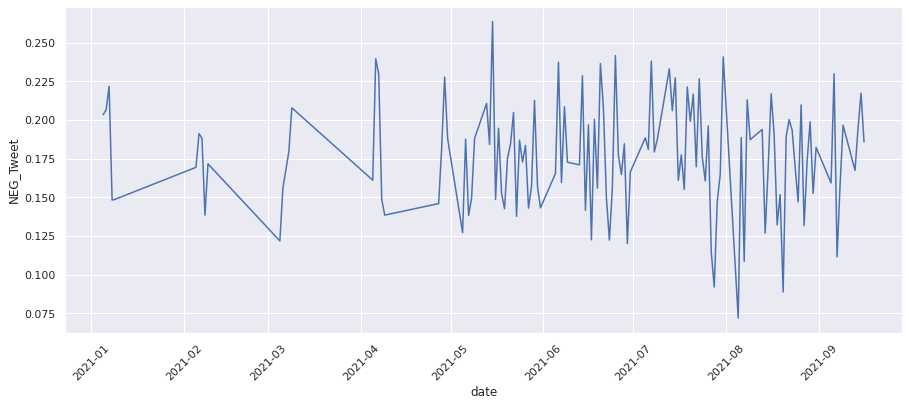

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'NEG_Tweet',data=elon_mean);
plt.xticks(rotation=45);

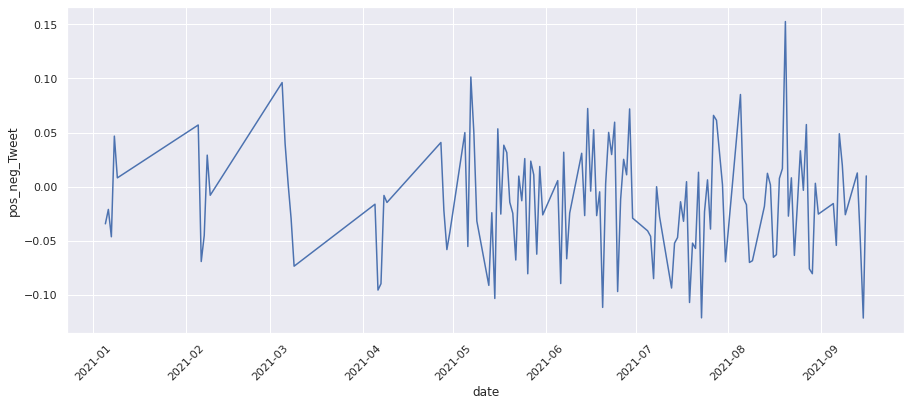

In [ ]:
elon_mean['pos_neg_Tweet'] = elon_mean.POS_Tweet-elon_mean.NEG_Tweet
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'pos_neg_Tweet',data=elon_mean);
plt.xticks(rotation=45);

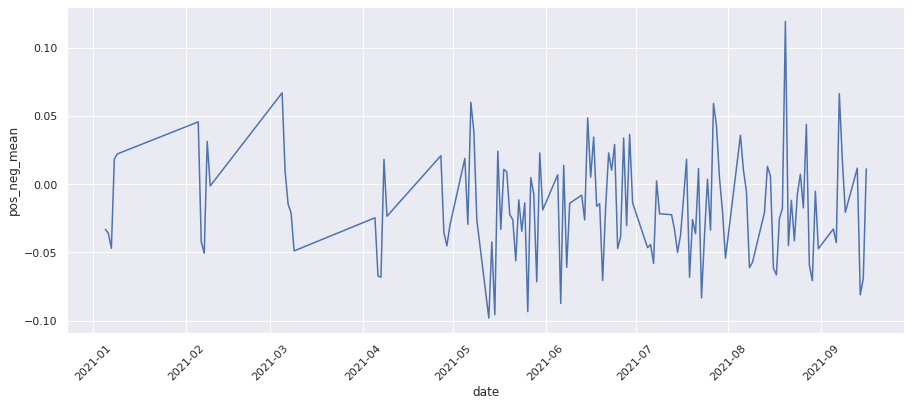

In [ ]:
elon_mean['mean_POS'] = (elon_mean.POS_Tweet+elon_mean.positive_Fin)/2
elon_mean['mean_NEG'] = (elon_mean.NEG_Tweet+elon_mean.negative_Fin)/2
elon_mean['pos_neg_mean'] = elon_mean.mean_POS-elon_mean.mean_NEG
sns.set(rc={"figure.figsize":(15, 6)})
sns.lineplot(x = 'date',y = 'pos_neg_mean',data=elon_mean);
plt.xticks(rotation=45);